In [3]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from datetime import datetime

In [4]:
# read in review and movie data into data frames
dfb = pd.read_csv('../cleandata/rotten_tomatoes_movie_reviews_clean_binary.csv', index_col=False)   
dfs = pd.read_csv('../cleandata/rotten_tomatoes_movie_reviews_clean_scale.csv', index_col=False)
dfm = pd.read_csv('../cleandata/rotten_tomatoes_movies_clean.csv', index_col=False)

print(dfm.head(10))

                         id                     title  audienceScore  \
0               adrift_2018                    Adrift           65.0   
1      1035316-born_to_kill              Born to Kill           74.0   
2      margarita_happy_hour      Margarita Happy Hour            NaN   
3               1221483-paa                       Paa           67.0   
4    sarah_palin_you_betcha  Sarah Palin: You Betcha!           61.0   
5      a_state_of_mind_2005           A State of Mind           92.0   
6  tripping_with_nils_frahm  Tripping with Nils Frahm            NaN   
7                haunted_3d                   Haunted           74.0   
8              gun_shy_2017                     Salty           38.0   
9               johnny_cool               Johnny Cool           44.0   

   tomatoMeter rating                                     ratingContents  \
0         69.0  PG-13  ['Injury Images', 'Brief Drug Use', 'Thematic ...   
1         83.0    NaN                                  

In [5]:
dfr = dfm.filter(['id', 'title', 'releaseDateTheaters'])
dfw = dfs.filter(['id', 'creationDate', 'isTopCritic', 'originalScore'])
dfw['binaryScore'] = [0 if sS == "NEGATIVE" else 1 for sS in dfs['scoreSentiment']]

movie_ids_winfo = pd.unique(dfr['id']).tolist()

mask = dfw['id'].isin(movie_ids_winfo)
dfw = dfw[mask]

cutoff_week = 2

dfw = dfw.merge(dfr[['id', 'releaseDateTheaters']], on='id', how='inner')
dfw['releaseDateTheaters'] = pd.to_datetime(dfw['releaseDateTheaters'])
dfw['creationDate'] = pd.to_datetime(dfw['creationDate'])
dfw['reviewWeek'] = (dfw['creationDate']-dfw['releaseDateTheaters']).dt.days
dfw['reviewWeek'] = [math.floor(d/7) for d in dfw['reviewWeek']]

dfw_chopped = dfw[dfw['reviewWeek']<2]

movie_ids_wrevs = pd.unique(dfw_chopped['id']).tolist()
mask2 = dfr['id'].isin(movie_ids_wrevs)
dfr = dfr[mask2]

movie_ids_winfo = pd.unique(dfr['id']).tolist()

print(len(movie_ids_wrevs))
print(len(dfr))
print(len(movie_ids_winfo))

dfr = dfr.sort_values('id')
dfw_chopped = dfw_chopped.sort_values('id')

print(dfr.head(10))
print(dfw_chopped.head(20))


13588
13588
13588
                                id                          title  \
22773              10000390-mickey                         Mickey   
15415                     10000_bc                    10,000 B.C.   
24815                     10000_km                  Long Distance   
16184              10002008-charly                         Charly   
18155                10002625-hero  The Hero: Love Story of a Spy   
669              10003276-criminal                       Criminal   
28290        10003645-twin_sisters                   Twin Sisters   
2907       10004288-running_scared                 Running Scared   
26745  10004352-going_the_distance             Going the Distance   
19734         10004504-ultraviolet                    Ultraviolet   

      releaseDateTheaters  
22773          2004-04-30  
15415          2008-03-07  
24815          2015-07-10  
16184          2002-09-27  
18155          2003-04-09  
669            2004-09-10  
28290          2005-05-06 

In [6]:
sumoS = dfw_chopped.groupby('id')['originalScore'].sum().tolist()
sumbS = dfw_chopped.groupby('id')['binaryScore'].sum().tolist()
avoS = dfw_chopped.groupby('id')['originalScore'].mean().tolist()
avbS = dfw_chopped.groupby('id')['binaryScore'].mean().tolist()
numRevs = dfw_chopped['id'].value_counts()
numRevs.name = 'numRevs'

dfr['sumOriginalScore'] = sumoS
dfr['sumBinaryScore'] = sumbS
dfr['avOriginalScore'] = avoS
dfr['avBinaryScore'] = avbS
dfr = dfr.join(numRevs, on='id')

print(dfr.head(10))

                                id                          title  \
22773              10000390-mickey                         Mickey   
15415                     10000_bc                    10,000 B.C.   
24815                     10000_km                  Long Distance   
16184              10002008-charly                         Charly   
18155                10002625-hero  The Hero: Love Story of a Spy   
669              10003276-criminal                       Criminal   
28290        10003645-twin_sisters                   Twin Sisters   
2907       10004288-running_scared                 Running Scared   
26745  10004352-going_the_distance             Going the Distance   
19734         10004504-ultraviolet                    Ultraviolet   

      releaseDateTheaters  sumOriginalScore  sumBinaryScore  avOriginalScore  \
22773          2004-04-30          1.325000               1         0.662500   
15415          2008-03-07         30.783333               7         0.349811   


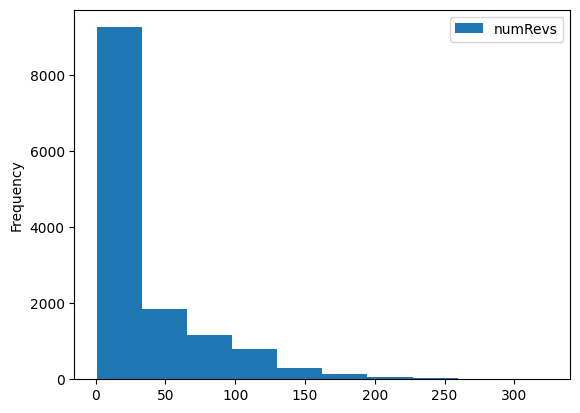

In [7]:
ax = dfr.plot.hist(column=["numRevs"])